In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division

import json
import pickle
import pandas as pd
import numpy as np
import math
from scipy.ndimage.interpolation import shift
import operator
import scipy as sc

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# our common utility functions that are used in different notebooks
from utils import *


pd.options.display.max_columns = None
pd.set_option('compute.use_bottleneck', True)
pd.set_option('compute.use_numexpr', True)


Match id:60565
Min: 7, second: 4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  3  5  8  9 12 14 15 16 17]
home_X: 95.184


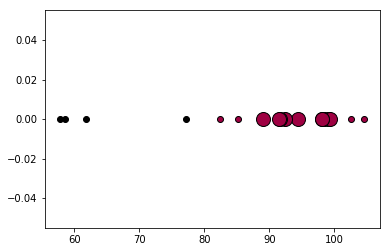

Min: 7, second: 5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  3  5  8  9 12 14 15 16 17]
home_X: 95.04400000000001


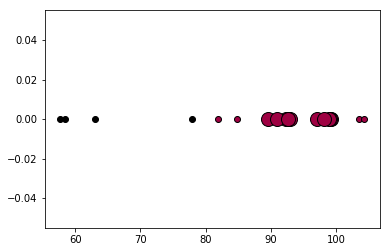

Min: 7, second: 6
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  3  5  8  9 12 14 15 16 17]
home_X: 94.523


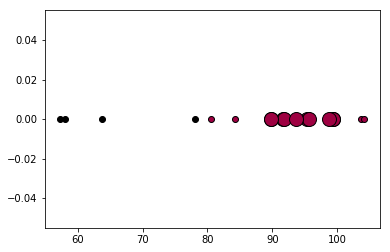

Min: 7, second: 7
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  6  9 10 13 15 16 17 18]
home_X: 94.44399999999999


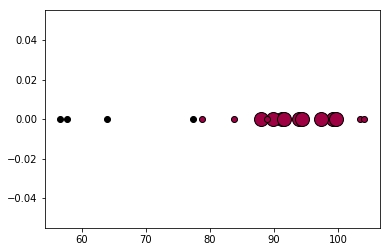

Min: 7, second: 8
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6  9 10 13 16 17 18]
home_X: 94.56700000000001


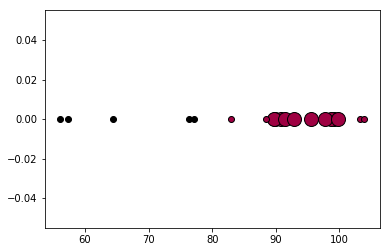

Min: 7, second: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6 10 13 15 16 17 18]
home_X: 94.574


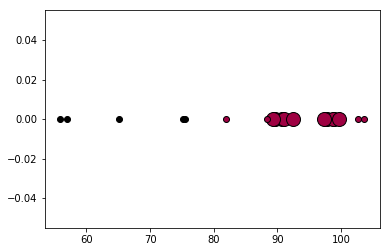

Min: 7, second: 10
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5 10 13 15 16 17 18]
home_X: 95.26111111111112


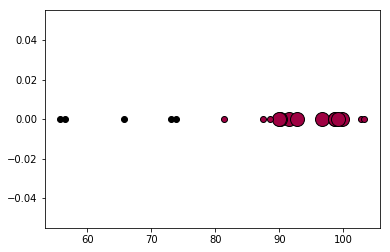

Min: 7, second: 11
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5 10 13 15 16 17 18]
home_X: 95.39888888888889


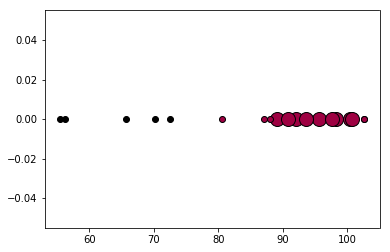

Min: 7, second: 12
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6 10 13 15 16 17]
home_X: 93.9688888888889


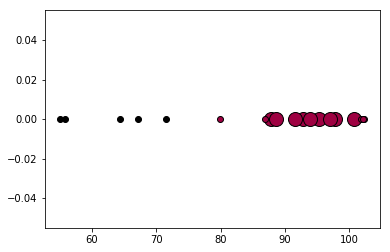

Min: 7, second: 13
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6 10 11 13 15 16 17]
home_X: 94.60000000000001


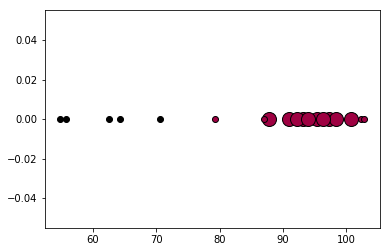

Min: 7, second: 14
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  6  9 10 13 15 16 17]
home_X: 95.04272727272728


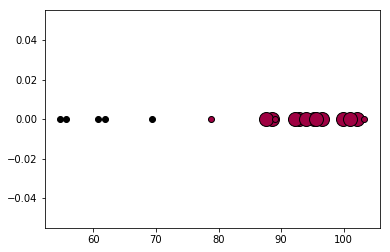

Min: 7, second: 15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 11 13 15 16 17]
home_X: 94.38900000000001


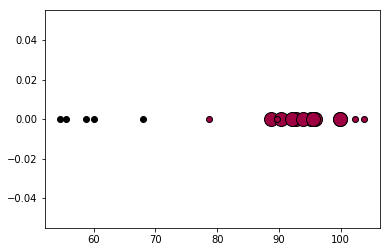

Min: 7, second: 16
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6  9 10 11 13 15 16 17]
home_X: 93.71000000000002


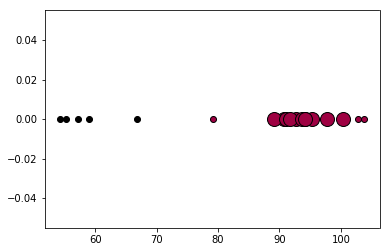

Min: 7, second: 17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6  9 10 11 13 15 16 17]
home_X: 93.21545454545456


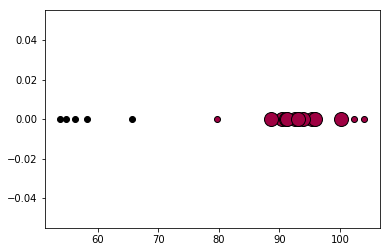

Min: 7, second: 18
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6  9 10 11 13 15 16 17]
home_X: 92.91181818181818


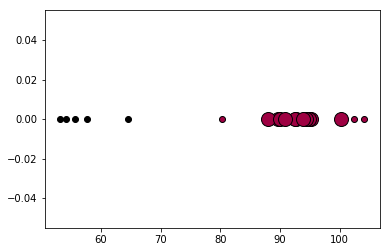

Min: 7, second: 19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  6  9 11 13 15 16 17]
home_X: 91.804


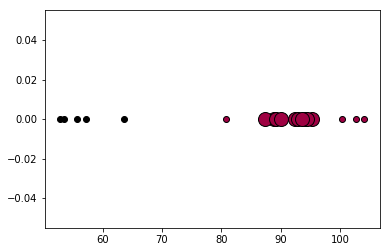

Min: 7, second: 20
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  2  4  5  8 10 12 14 15 16]
home_X: 91.595


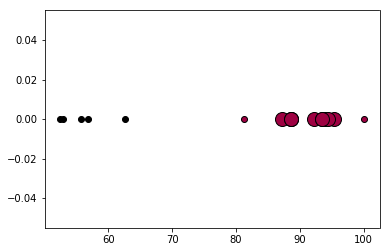

Min: 7, second: 21
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  2  4  5  8 10 12 14 15 16]
home_X: 91.69399999999999


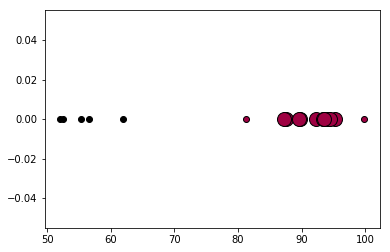

Min: 7, second: 22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  2  4  5  8 10 12 14 15 16]
home_X: 91.963


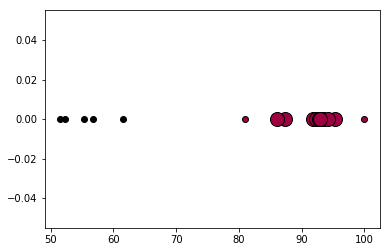

Min: 7, second: 23
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  2  4  5  8 10 12 14 15 16]
home_X: 92.00700000000002


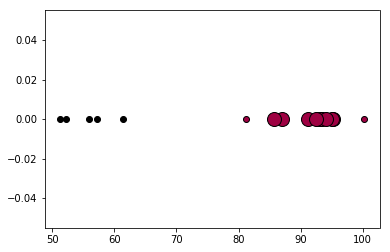

Min: 7, second: 24
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  3  5  6  9 11 13 15 16 17]
home_X: 91.89299999999999


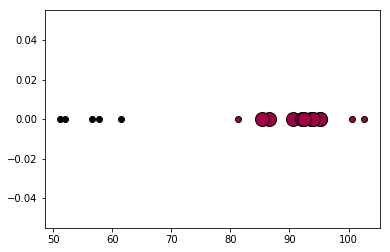

Min: 7, second: 25
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  3  5  6  9 10 11 13 15 16 17]
home_X: 92.95272727272727


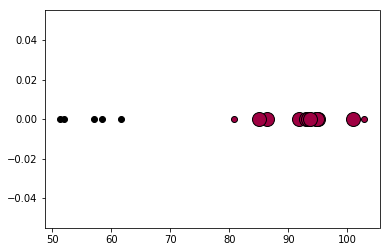

Min: 7, second: 26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  6  9 10 11 13 16 17]
home_X: 95.41090909090912


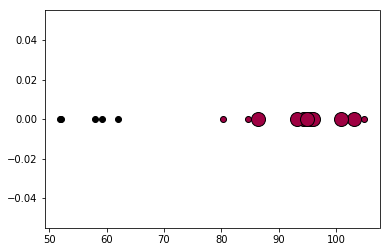

Min: 7, second: 27
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  6 10 11 13 16 17]
home_X: 96.39200000000001


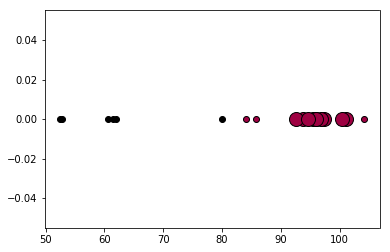

Min: 7, second: 28
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  3  5  6 10 11 13 15 17 18 19]
home_X: 95.45583333333336


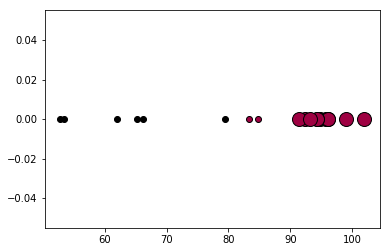

Min: 7, second: 29
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  3  5  6  9 10 11 13 15 17 18 19]
home_X: 92.41461538461539


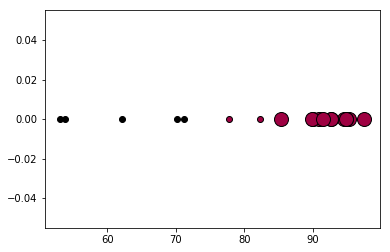

Min: 7, second: 30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  3  5  6  9 10 11 13 15 16 17 18 19]
home_X: 89.58142857142856


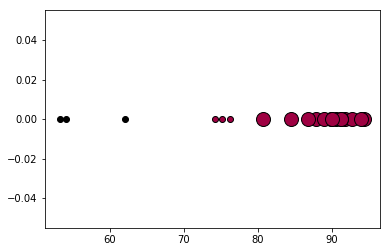

Min: 7, second: 31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  6  8  9 10 12 14 16 17 18]
home_X: 88.31153846153846


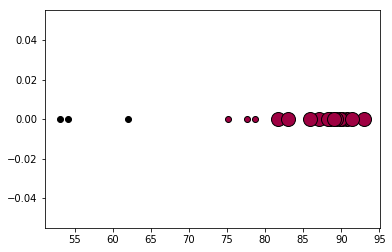

Min: 7, second: 32
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  6  8  9 10 12 13 14 16 17 18]
home_X: 86.42214285714284


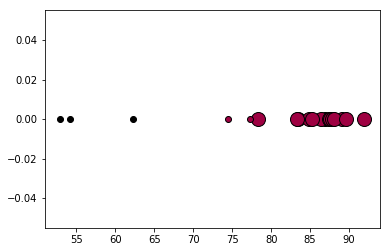

Min: 7, second: 33
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  8  9 10 12 13 14 15 16 17 18]
home_X: 86.57142857142857


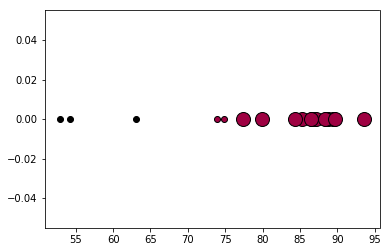

Min: 7, second: 34
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  5  7  9 10 11 13 14 15 17 18 19]
home_X: 87.72999999999999


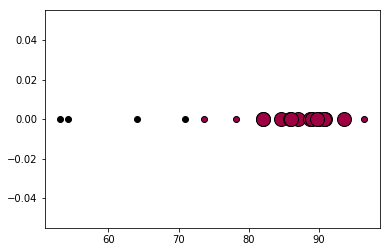

Min: 7, second: 35
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  5  7  9 10 11 13 14 15 17 18]
home_X: 88.66166666666668


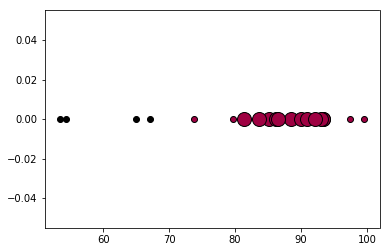

Min: 7, second: 36
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  2  5  7  9 10 13 14 15 17 18]
home_X: 91.38727272727273


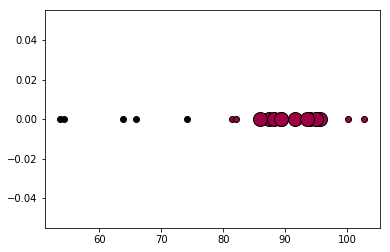

Min: 7, second: 37
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  5  7  9 10 13 14 15 17]
home_X: 92.848


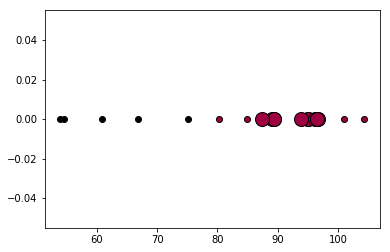

Min: 7, second: 38
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  5  7  9 10 13 15 17]
home_X: 94.1888888888889


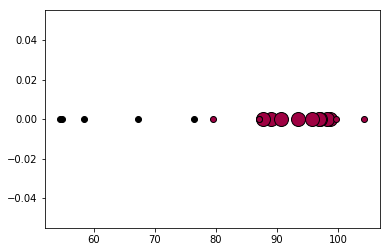

Min: 7, second: 39
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  5  9 10 13 15 16 17 18]
home_X: 94.51111111111112


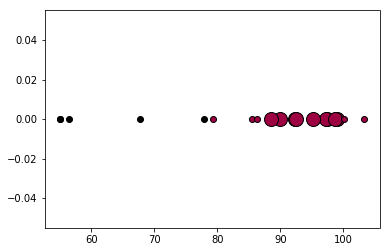

Min: 7, second: 40
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  5  9 10 13 15 16 17 18]
home_X: 94.64444444444445


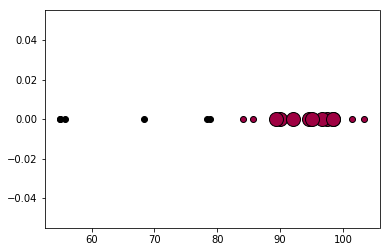

Min: 7, second: 41
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  5  9 10 13 15 16 17 18]
home_X: 94.54333333333334


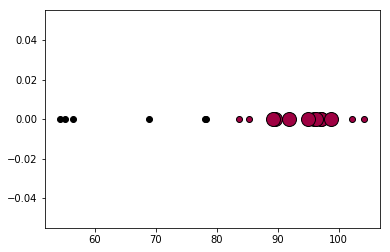

Min: 7, second: 42
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  5  9 10 13 15 16 17 18]
home_X: 94.61444444444446


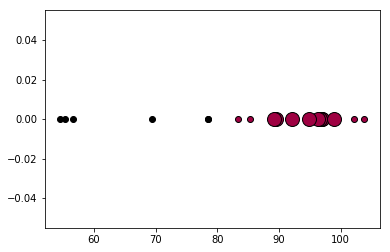

Min: 7, second: 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  9 10 13 15 16 17 18]
home_X: 96.0590909090909


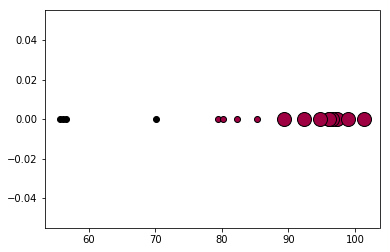

Min: 7, second: 44
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 3  5  9 10 13 15 16 17 18]
home_X: 94.92222222222223


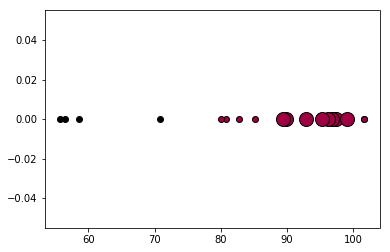

Min: 7, second: 45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 13 15 16 17 18]
home_X: 95.655


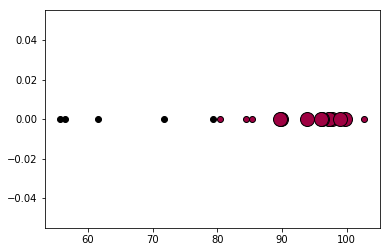

Min: 7, second: 46
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 11 13 15 16 17 18]
home_X: 94.98909090909092


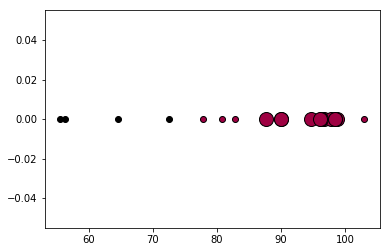

Min: 7, second: 47
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 11 13 15 16 17 18]
home_X: 95.30818181818181


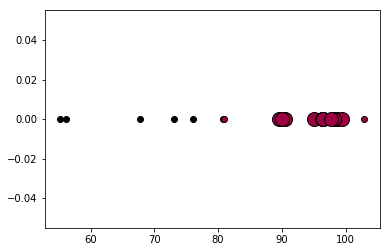

Min: 7, second: 48
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 11 13 15 16 17 18]
home_X: 95.71727272727271


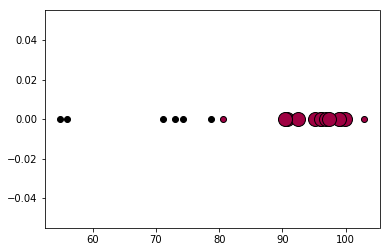

Min: 7, second: 49
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  9 10 11 13 15 16 17 18]
home_X: 96.27666666666666


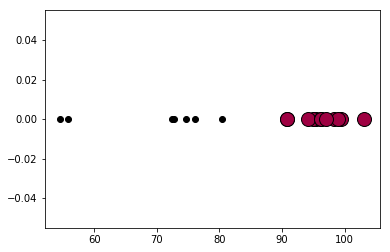

Min: 7, second: 50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  9 10 11 13 15 16 17 18]
home_X: 95.88666666666666


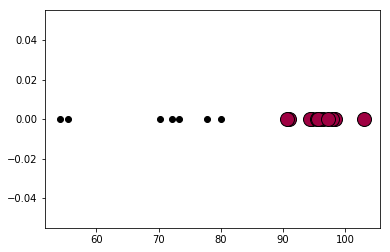

Min: 7, second: 51
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  2  3  5  9 10 11 13 15 16 17 18]
home_X: 95.66416666666669


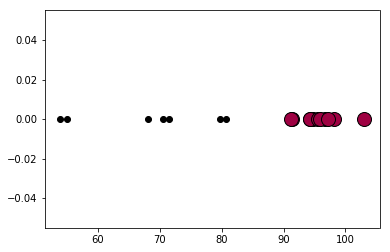

Min: 7, second: 52
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  3  5  9 10 11 13 15 16 17 18]
home_X: 94.79272727272725


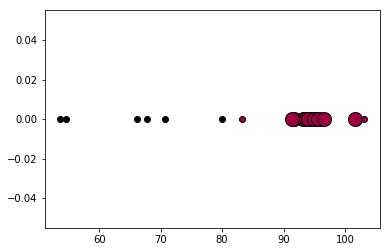

In [84]:
with open('../data/general/matches_2017_2018_v1.json') as matches_json:
    matches = json.load(matches_json)

minutes_step = 15 # timeline for calculating avrg pos

role_segment_coord = [[0, 40, 0, 19],    # Left Back 
                      [0, 35, 19, 49],   # Center Back
                      [0, 40, 49, 68],   # Right Back
                      [40, 105, 0, 19],  # Left Winger
                      [35, 75, 19, 49],  # Center Midfielder  
                      [40, 105, 49, 68], # Right Winger
                      [75, 105, 19, 49]] # Center Forward/Attacking Middle


for match_data in matches:

    
    id = int(match_data['id'])
#     if id!=60617 and id!=60634 and id!=60696 and id!=60706 and id!=60821 and id!=60845 and id!=116001326:
    if id==60565:
    
        print("\nMatch id:" + str(id))

        # defining 3 distinct id in game
        referee_id = 0
        home_team_id = int(match_data['homeId']) 
        away_team_id = int(match_data['awayId']) 

        # home and away player list
        home_team_player = []
        home_goal_keeper = []
        away_team_player = []
        away_goal_keeper = []
        
        refreee_pos_noise = True
        
        
        ball_index_state=1
        
        # all data
        all_data = []
        all_data_count = []

        # home_nonzero
        home_player_count_pitch = []
        home_prev_count = 11

        # home_nonzero
        away_player_count_pitch = []
        away_prev_count = 11

        # player dicts
        home_dict = {} 
        away_dict = {}
        
        # for detection noise data on x=0, y=0
        player_has_ball_detected = False
        
        # features vectors
        home_features_df = np.zeros(shape=(7, 16), dtype=np.float)
        away_features_df = np.zeros(shape=(7, 16), dtype=np.float)
        
        # ball location
        ball_location =  np.zeros(shape=(2), dtype=np.float)

        # team features
        home_df = np.zeros(shape=(7), dtype=np.float)
        away_df = np.zeros(shape=(7), dtype=np.float)
        
        
        # features vectors count
        home_feature_count = np.zeros(shape=(7, 1), dtype=np.float)
        away_feature_count = np.zeros(shape=(7, 1), dtype=np.float)
        
        #features speed dict
        home_f_speed_dict = {0:{}, 1:{}, 2:{}, 3:{}, 4:{}, 5:{}, 6:{}}
        away_f_speed_dict = {0:{}, 1:{}, 2:{}, 3:{}, 4:{}, 5:{}, 6:{}}
        
        # features for Refreee and GKs
        refree_features = np.zeros(shape=(1,5), dtype=np.float)
        GK_home_features = np.zeros(shape=(1,3), dtype=np.float)
        GK_away_features = np.zeros(shape=(1,3), dtype=np.float)
        
        # ball position
        ball_pos_index = np.zeros(shape=(1), dtype=np.int8)

        # game duration
        whole_game_duration = 0

        # players position ID 
        player_positionId = {'homeTeam' : {}, 'awayTeam' : {}}

        with open('../data/match_' + str(id) + '/roster_data_' + str(id) + '.json', 'r') as file:
            match_squad = json.load(file)

        for roaster in match_squad:
            if roaster['teamId'] == home_team_id:
                home_team_player.append(str(roaster['jerseyNumber']))
                player_positionId['homeTeam'][roaster['jerseyNumber']] = roaster['positionId'] 
                if roaster['positionId'] == 1:
                    home_goal_keeper.append(str(roaster['jerseyNumber']))


            elif roaster['teamId'] == away_team_id:
                away_team_player.append(str(roaster['jerseyNumber']))
                player_positionId['awayTeam'][roaster['jerseyNumber']] = roaster['positionId']
                if roaster['positionId'] == 1:
                    away_goal_keeper.append(str(roaster['jerseyNumber']))


        # home players dict data
        home_team_player.sort(key=int)
        home_goal_keeper.sort(key=int)
        home_val = np.arange(0, len(home_team_player))
        home_dict = dict(zip(home_team_player, home_val))
        home_dict_reverse = dict(zip(home_val, home_team_player))


        # away players dict data
        away_team_player.sort(key=int)
        away_goal_keeper.sort(key=int)
        away_val = np.arange(0, len(away_team_player))
        away_dict = dict(zip(away_team_player, away_val))
        away_dict_reverse = dict(zip(away_val, away_team_player))

        # home and away team players' status[0: not playing, 1: playing, 2-left the game], 
        #enter status[0: enter 1st half, 1: enter second half],
        # enter time, and duration, red card
        home_dur_in_out = np.zeros(shape=(len(home_team_player), 5), dtype=np.float)
        away_dur_in_out = np.zeros(shape=(len(away_team_player), 5), dtype=np.float)


        with open('../data/match_' + str(id) + '/players_data_' + str(id) + '.json', 'r') as file:
            player_data = json.load(file)


        for player in player_data:
            jersey_number = player['jerseyNumber']
            if player['teamId'] == home_team_id:
                home_dur_in_out[home_dict[str(jersey_number)]][3] = player['duration']
                home_dur_in_out[home_dict[str(jersey_number)]][4] = player['redCard']

            elif player['teamId'] == away_team_id:
                away_dur_in_out[away_dict[str(jersey_number)]][3] = player['duration']
                away_dur_in_out[away_dict[str(jersey_number)]][4] = player['redCard']

        # home and away team player pos and activity count: 0-xpos, 1-ypos
        home_pos_count = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
        home_activity_count = np.zeros(shape=(len(home_team_player), 1), dtype=np.int8)
        home_activity_count_all = np.zeros(shape=(len(home_team_player), 2), dtype=np.int8)
        home_act_nozero = [0,0] # number non-zero activity_count_all


        away_pos_count = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)
        away_activity_count = np.zeros(shape=(len(away_team_player), 1), dtype=np.int8)
        away_activity_count_all = np.zeros(shape=(len(away_team_player), 2), dtype=np.int8)
        away_act_nozero = [0,0] # number non-zero activity_count_all
        
        # team positions
        home_team_role =  np.zeros(shape=(len(home_team_player), 1), dtype=np.int8)
        away_team_role =  np.zeros(shape=(len(away_team_player), 1), dtype=np.int8)


        # home and away team player count data for 10 min: 0-xpos, 1-ypos / 0-1min, 1-2min... 9-10min 
        home_pos_count_minutes = np.zeros(shape=(len(home_team_player), 2, minutes_step), dtype=np.float)
        home_activity_count_minutes = np.zeros(shape=(len(home_team_player), minutes_step), dtype=np.int8)

        home_pos_count_minutes2 = np.zeros(shape=(len(home_team_player), 2, minutes_step), dtype=np.float)
        home_activity_count_minutes2 = np.zeros(shape=(len(home_team_player), minutes_step), dtype=np.int8)

        away_pos_count_minutes = np.zeros(shape=(len(away_team_player), 2, minutes_step), dtype=np.float)
        away_activity_count_minutes = np.zeros(shape=(len(away_team_player), minutes_step), dtype=np.int8)

        away_pos_count_minutes2 = np.zeros(shape=(len(away_team_player), 2, minutes_step), dtype=np.float)
        away_activity_count_minutes = np.zeros(shape=(len(away_team_player), minutes_step), dtype=np.int8)


        # home and away team mean pos data: 0-xpos, 1-ypos
        home_pos_mean = np.zeros(shape=(len(home_team_player), 2), dtype=np.float)
        away_pos_mean = np.zeros(shape=(len(away_team_player), 2), dtype=np.float)


        # players's and refree's previous and next x&y data
        home_x_data = np.zeros(shape=(len(home_team_player),2), dtype=np.float)
        home_y_data = np.zeros(shape=(len(home_team_player),2), dtype=np.float)
        
        away_x_data = np.zeros(shape=(len(away_team_player),2), dtype=np.float)
        away_y_data = np.zeros(shape=(len(away_team_player),2), dtype=np.float)
        
        referee_xy_data = [[0,0],[0,0]]

        with open('../data/match_' + str(id) + '/per_sec_data_' + str(id) + '.json', 'r') as file:
            data_persec = json.load(file)

        home_pos_count_minutes = np.zeros(shape=(len(home_team_player), 2, minutes_step), dtype=np.float)
        home_activity_count_minutes = np.zeros(shape=(len(home_team_player), minutes_step), dtype=np.int8)

        away_pos_count_minutes = np.zeros(shape=(len(away_team_player), 2, minutes_step), dtype=np.float)
        away_activity_count_minutes = np.zeros(shape=(len(away_team_player), minutes_step), dtype=np.int8)

        # create first average positon data for assigning player position at the 1st half
        # temporary t
        
        home_activity_count_all[0: len(home_team_player)] = 0
        away_activity_count_all[0: len(away_team_player)] = 0

        
        tmp_t = 0
        tmp_t_2 = 0
        shift_times_right = 0
        
        # threshol second:
        threshold_second = 60

        # 1st half duration
        first_half_duration = 0

        home_nonzero = 11
        away_nonzero = 11

        prev_home_nonzero = 11
        prev_away_nonzero = 11
        
        
        # for detection noise data on x=0, y=0
        player_has_ball_detected = False

        # temporary half
        tmp_half = 1

        c_activity_value = 0
        c_home_activity_each = 0
        c_away_activity_each = 0

        while c_activity_value==0:

            c_home_activity_each = 0
            c_away_activity_each = 0

            a,b = fist_time_step_mean_data(threshold_second, 1, data_persec, home_pos_count_minutes,
                                        home_activity_count_minutes,away_pos_count_minutes,
                                        away_activity_count_minutes,home_dict,away_dict,
                                        home_team_player,away_team_player, home_team_id, 
                                        away_team_id, player_positionId, minutes_step)

            for player_home in range(len(home_team_player)):
                res = caluclate_activity_count(minutes_step, player_home, a)
                c_home_activity_each += res

            for player_away in range(len(away_team_player)):
                res = caluclate_activity_count(minutes_step, player_away, b)
                c_away_activity_each += res

            if c_home_activity_each == 11 and c_away_activity_each == 11:
                c_activity_value = 1

            threshold_second += 60  

        threshold_second -= 1
        tmp_t_2 = threshold_second 
        

        
        for d in data_persec:

            match_half_t = int(d['half'])

            # create first average positon data for assigning player at the 2nd half
            if match_half_t != tmp_half and match_half_t==2:
                tmp_half = match_half_t
                shift_times_right = 0

                tmp_t = 45*60

                activity_home_nonzero = 0
                activity_away_nonzero = 0
                home_break_subs = []
                away_break_subs = []
                home_break_subs_after = []
                away_break_subs_after = []

                for player_home in range(0, len(home_team_player)):
                    if home_pos_mean[player_home][0] !=0:
                            activity_home_nonzero += 1
                            home_break_subs.append(1)
                    else:
                        home_break_subs.append(0)


                for player_away in range(0, len(away_team_player)):
                    if away_pos_mean[player_away][0] !=0:
                            activity_away_nonzero += 1
                            away_break_subs.append(1)
                    else:
                        away_break_subs.append(0)

                home_nonzero = activity_home_nonzero
                away_nonzero = activity_away_nonzero


                # clear home team data
                home_pos_count[0: len(home_team_player)] = 0
                home_activity_count[0: len(home_team_player)] = 0 
                home_activity_count_all[0: len(home_team_player)] = 0
                home_act_nozero = [0,0]
                home_pos_count_minutes[0: len(home_team_player)] = 0
                home_activity_count_minutes[0: len(home_team_player)] = 0
                home_pos_mean[0: len(home_team_player)] = 0

                # clear away team data
                away_pos_count[0: len(away_team_player)] = 0
                away_activity_count[0: len(away_team_player)] = 0 
                away_activity_count_all[0: len(away_team_player)] = 0
                away_act_nozero = [0,0]
                away_pos_count_minutes[0: len(away_team_player)] = 0
                away_activity_count_minutes[0: len(away_team_player)] = 0
                away_pos_mean[0: len(away_team_player)] = 0
                
 
                peed_dict = {0:{}, 1:{}, 2:{}, 3:{}, 4:{}, 5:{}, 6:{}}
                
                # index 
                ball_pos_index[0] = 0
                
                # previus and next x data
                home_x_data[:]=0
                away_x_data[:]=0
                referee_xy_data = [[0,0],[0,0]]

                threshold_second = 60
                
                refreee_pos_noise = True

                c_activity_value = 0
                c_home_activity_each = 0
                c_away_activity_each = 0

                while c_activity_value==0:

                    c_home_activity_each = 0
                    c_away_activity_each = 0

                    home_break_subs_after = []
                    away_break_subs_after = []

                    a,b = fist_time_step_mean_data(threshold_second,2,data_persec,home_pos_count_minutes,
                                        home_activity_count_minutes,away_pos_count_minutes,
                                        away_activity_count_minutes,home_dict,away_dict,
                                        home_team_player,away_team_player, home_team_id, 
                                        away_team_id, player_positionId, minutes_step)

                    for player_home in range(len(home_team_player)):
                        res = caluclate_activity_count(minutes_step, player_home, a)
                        c_home_activity_each += res
                        home_break_subs_after.append(res)

                    for player_away in range(len(away_team_player)):
                        res = caluclate_activity_count(minutes_step, player_away, b)
                        c_away_activity_each += res
                        away_break_subs_after.append(res)


                    if c_home_activity_each == activity_home_nonzero and c_away_activity_each == activity_away_nonzero:
                        c_activity_value = 1

                    threshold_second += 60


                for player_home_2 in range(0, len(home_team_player)):
                    if home_break_subs_after[player_home_2]==0 and home_break_subs[player_home_2]==1:
                        home_dur_in_out[player_home_2][0] = 2 # menas goal keepr has left the game

                for player_away_2 in range(0, len(away_team_player)):
                    if away_break_subs_after[player_away_2]==0 and away_break_subs[player_away_2]==1:
                        away_dur_in_out[player_away_2][0] = 2 # menas goal keepr has left the game

                threshold_second -= 1
                tmp_t_2 = threshold_second 

            i = int(d['minute'])*60 + int(d['second'])
            x_pos = round(d['xpos'],2)
            y_pos = round(d['ypos'],2)
            team_id_t = int(d['teamId'])
            speed_t = round(d['speed'],2)
            jersey_number_t = int(d['jerseyNumber'])
            has_ball_teamId_t = int(d['hasballTeamId'])
            has_ball_jerseyId_t = int(d['hasballJerseyNumber'])
            
            if x_pos<0:
                x_pos=0
            if y_pos<=0:
                y_pos=0


            # find out how long did 1st half last
            if match_half_t == 1:
                first_half_duration = i


            if i%60==59:

                if team_id_t == home_team_id:
                    player = home_dict[str(jersey_number_t)]
                    home_activity_count_all[player][1] = 1

                elif team_id_t == away_team_id:
                    player = away_dict[str(jersey_number_t)]
                    away_activity_count_all[player][1] = 1
      
            if i%60!=0:    

                if team_id_t == home_team_id:

                    if home_dur_in_out[home_dict[str(jersey_number_t)]][0] == 0:
                        home_dur_in_out[home_dict[str(jersey_number_t)]][0] = 1 # indicates that a player is in game 
                        home_dur_in_out[home_dict[str(jersey_number_t)]][1] = match_half_t # enter half
                        home_dur_in_out[home_dict[str(jersey_number_t)]][2] = i  # enter time


                        plyr_position = player_positionId['homeTeam'][jersey_number_t]
                        player = home_dict[str(jersey_number_t)]
                        home_pos_count_minutes[player][1][minutes_step-1] += 34
                        home_activity_count_minutes[player][minutes_step-1] +=1


                        if plyr_position == 1:
                            home_pos_count_minutes[player][0][minutes_step-1] += 10
                        elif plyr_position == 2:
                            home_pos_count_minutes[player][0][minutes_step-1] += 38
                        elif plyr_position == 3:
                            home_pos_count_minutes[player][0][minutes_step-1] += 58
                        else:
                            home_pos_count_minutes[player][0][minutes_step-1] += 78

                    if i<((home_dur_in_out[home_dict[str(jersey_number_t)]][2])+60) and home_dur_in_out[home_dict[str(jersey_number_t)]][0] == 1:
                        if x_pos!=0 and y_pos!=0:
                            home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                            home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                            home_activity_count[home_dict[str(jersey_number_t)]] +=1 

                    elif player_positionId['homeTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                        if x_pos!=0 and y_pos!=0:
                            home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                            home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                            home_activity_count[home_dict[str(jersey_number_t)]] +=1

                    elif has_ball_teamId_t == away_team_id:
                        if x_pos!=0 and y_pos!=0:
                            home_pos_count[home_dict[str(jersey_number_t)]][0] += x_pos
                            home_pos_count[home_dict[str(jersey_number_t)]][1] += y_pos
                            home_activity_count[home_dict[str(jersey_number_t)]] +=1 

                elif team_id_t == away_team_id:

                    if away_dur_in_out[away_dict[str(jersey_number_t)]][0] == 0:
                        away_dur_in_out[away_dict[str(jersey_number_t)]][0] = 1 # indicates that a player is in game
                        away_dur_in_out[away_dict[str(jersey_number_t)]][1] = match_half_t # enter half 
                        away_dur_in_out[away_dict[str(jersey_number_t)]][2] = i #enter time

                        plyr_position = player_positionId['awayTeam'][jersey_number_t]
                        player = away_dict[str(jersey_number_t)]
                        away_pos_count_minutes[player][1][minutes_step-1] += 34
                        away_activity_count_minutes[player][minutes_step-1] +=1


                        if plyr_position == 1:
                            away_pos_count_minutes[player][0][minutes_step-1] += 10
                        elif plyr_position == 2:
                            away_pos_count_minutes[player][0][minutes_step-1] += 38
                        elif plyr_position == 3:
                            away_pos_count_minutes[player][0][minutes_step-1] += 58
                        else:
                            away_pos_count_minutes[player][0][minutes_step-1] += 78


                    if i<((away_dur_in_out[away_dict[str(jersey_number_t)]][2])+60) and away_dur_in_out[away_dict[str(jersey_number_t)]][0] == 1:
                        if x_pos!=0 and y_pos!=0:
                            away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                            away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                            away_activity_count[away_dict[str(jersey_number_t)]] +=1

                    elif player_positionId['awayTeam'][jersey_number_t] == 1 and has_ball_teamId_t != 0:
                        away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                        away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                        away_activity_count[away_dict[str(jersey_number_t)]] +=1

                    elif has_ball_teamId_t == home_team_id:
                         if x_pos!=0 and y_pos!=0:
                            away_pos_count[away_dict[str(jersey_number_t)]][0] += x_pos
                            away_pos_count[away_dict[str(jersey_number_t)]][1] += y_pos
                            away_activity_count[away_dict[str(jersey_number_t)]] +=1 

             
            # shifing last index of 15min arry (period of 15min) with last min data
            # and calculate mena position of each player each min based on previus 10 min
            if i%60 == 0 and tmp_t != i+1 and (i-(match_half_t-1)*45*60)>threshold_second:


                tmp_t = i+1

                prev_home_nonzero = home_nonzero
                home_nonzero = 0

                prev_away_nonzero = away_nonzero
                away_nonzero = 0


                if shift_times_right !=0:
                    for player_home in range(len(home_team_player)):

                        home_pos_count_minutes[player_home][0] = (shift(home_pos_count_minutes[player_home][0], -1, cval=0))
                        home_pos_count_minutes[player_home][1] = (shift(home_pos_count_minutes[player_home][1], -1, cval=0))
                        home_activity_count_minutes[player_home] = (shift(home_activity_count_minutes[player_home], -1, cval=0))

                        home_pos_count_minutes[player_home][0][minutes_step-1] = home_pos_count[player_home][0]
                        home_pos_count_minutes[player_home][1][minutes_step-1] = home_pos_count[player_home][1]
                        home_activity_count_minutes[player_home][minutes_step-1] = home_activity_count[player_home]


                    for player_away in range(len(away_team_player)):

                        away_pos_count_minutes[player_away][0] = (shift(away_pos_count_minutes[player_away][0], -1, cval=0))
                        away_pos_count_minutes[player_away][1] = (shift(away_pos_count_minutes[player_away][1], -1, cval=0))
                        away_activity_count_minutes[player_away] = (shift(away_activity_count_minutes[player_away], -1, cval=0))

                        away_pos_count_minutes[player_away][0][minutes_step-1] = away_pos_count[player_away][0]
                        away_pos_count_minutes[player_away][1][minutes_step-1] = away_pos_count[player_away][1]
                        away_activity_count_minutes[player_away][minutes_step-1] = away_activity_count[player_away]


                shift_times_right = 1


                # clear home team
                home_pos_count[0: len(home_team_player)] = 0
                home_activity_count[0: len(home_team_player)] = 0

                # clear away team
                away_pos_count[0: len(away_team_player)] = 0
                away_activity_count[0: len(away_team_player)] = 0


                home_pos_mean[0:len(home_team_player)] = 0
                home_act_nozero = [0,0]

                away_pos_mean[0:len(away_team_player)] = 0
                away_act_nozero = [0,0]

                for player_home in range(len(home_team_player)):
                    jersey_n = int(home_dict_reverse[player_home])
                    if player_positionId['homeTeam'][jersey_n] == 1 and home_dur_in_out[player_home][0]==1 and home_activity_count_all[player_home][1] == 0:
                        action_status_exit = 0
                        
                        if home_dur_in_out[player_home][4]==1:
                            enter_half = home_dur_in_out[player_home][1]
                            enter_time = home_dur_in_out[player_home][2]
                            p_game_play_dur = home_dur_in_out[player_home][3]

                            h = match_half_t
                            f_h_d= first_half_duration

                            if enter_half == 1:
                                current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                            elif enter_half == 2:
                                current_play_dur = math.floor( (i - enter_time)/60 )

                            if current_play_dur < p_game_play_dur:


                                for gk_i in home_goal_keeper:
                                    if home_activity_count_all[home_dict[str(gk_i)]][1] !=0:
                                        home_dur_in_out[player_home][0] = 2 # menas goal keepr has left the game
                                        home_pos_mean[player_home][0] = 0 
                                        home_pos_mean[player_home][1] = 0
                                        action_status_exit = 1
                        else:
                            for gk_i in home_goal_keeper:
                                if home_activity_count_all[home_dict[str(gk_i)]][1] !=0:
                                    home_dur_in_out[player_home][0] = 2 # menas goal keepr has left the game
                                    home_pos_mean[player_home][0] = 0 
                                    home_pos_mean[player_home][1] = 0
                                    action_status_exit = 1
                            

                        if action_status_exit == 0:
                            home_activity_count_all[player_home][1] = 1

                    if (home_activity_count_all[player_home][0]==1):
                        home_act_nozero[0] += 1

                    if (home_activity_count_all[player_home][1]==1):
                        home_act_nozero[1] += 1
                        
                

                for player_away in range(len(away_team_player)):
                    jersey_n = int(away_dict_reverse[player_away])
                    if player_positionId['awayTeam'][jersey_n] == 1 and away_dur_in_out[player_away][0]==1 and away_activity_count_all[player_away][1] == 0:
                        action_status_exit = 0
                        
                        if away_dur_in_out[player_away][4]==1:

                            # player current and whole game duration durng match
                            enter_half = away_dur_in_out[player_away][1]
                            enter_time = away_dur_in_out[player_away][2]
                            p_game_play_dur = away_dur_in_out[player_away][3]

                            h = match_half_t
                            f_h_d= first_half_duration

                            if enter_half == 1:
                                current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                            elif enter_half == 2:
                                current_play_dur = math.floor( (i - enter_time)/60 )

                            if current_play_dur < p_game_play_dur:

                                for gk_i in away_goal_keeper:
                                    if away_activity_count_all[away_dict[str(gk_i)]][1] !=0:
                                        away_dur_in_out[player_away][0] = 2 # menas goal keepr has left the game
                                        away_pos_mean[player_away][0] = 0 
                                        away_pos_mean[player_away][1] = 0
                                        action_status_exit = 1
                        else:
                            for gk_i in away_goal_keeper:
                                if away_activity_count_all[away_dict[str(gk_i)]][1] !=0:
                                    away_dur_in_out[player_away][0] = 2 # menas goal keepr has left the game
                                    away_pos_mean[player_away][0] = 0 
                                    away_pos_mean[player_away][1] = 0
                                    action_status_exit = 1
                            
                        if action_status_exit == 0:
                            away_activity_count_all[player_away][1] = 1


                    if (away_activity_count_all[player_away][0]!=0):
                        away_act_nozero[0] += 1

                    if (away_activity_count_all[player_away][1]!=0):
                        away_act_nozero[1] += 1

                home_subs_count_check = 0
                home_subs_count_id = 0
                home_2subs_array_in = []
                home_2subs_array_out = []


                for player_home in range(len(home_team_player)):
                  

                    if home_activity_count_all[player_home][1] != 0 and home_dur_in_out[player_home][0]==1:

                        caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                           home_activity_count_minutes)

                        if home_act_nozero[0]-home_act_nozero[1]<0 and home_act_nozero[0]!=0 and home_activity_count_all[player_home][0] == 0:
                            home_pos_mean[player_home][0] = 0 
                            home_pos_mean[player_home][1] = 0
                            home_activity_count_all[player_home][1] = 0


                    elif home_activity_count_all[player_home][1] == 0 and home_dur_in_out[player_home][0]==1 and home_dur_in_out[player_home][4]==1: 
                        # player current and whole game duration durng match


                        enter_half = home_dur_in_out[player_home][1]
                        enter_time = home_dur_in_out[player_home][2]
                        p_game_play_dur = home_dur_in_out[player_home][3]

                        h = match_half_t
                        f_h_d= first_half_duration

                        if enter_half == 1:
                            current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                        elif enter_half == 2:
                            current_play_dur = math.floor( (i - enter_time)/60 )

                        if current_play_dur < p_game_play_dur:
                            caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                           home_activity_count_minutes)
                            home_activity_count_all[player_home][1] = 1
                        else:
                            home_dur_in_out[player_home][0] = 2
                            home_pos_mean[player_home][0] = 0 
                            home_pos_mean[player_home][1] = 0


                    elif home_activity_count_all[player_home][1] == 0 and home_dur_in_out[player_home][0]==1:

                        if (home_act_nozero[0] == home_act_nozero[1]):
                            home_dur_in_out[player_home][0]=2
                            home_pos_mean[player_home][0] = 0 
                            home_pos_mean[player_home][1] = 0

                        elif home_act_nozero[0] > home_act_nozero[1]:
                            caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                           home_activity_count_minutes)
                            home_activity_count_all[player_home][1] = 1
                            home_subs_count_check += 1
                            home_2subs_array_out.append(player_home)
                            home_subs_count_id = player_home

                    else:

                        home_pos_mean[player_home][0] = 0 
                        home_pos_mean[player_home][1] = 0


                for player_home in range(len(home_team_player)):
                    if home_subs_count_check >=1 and (home_act_nozero[0]-home_act_nozero[1]==1):

                        d = caluclate_nzero_activity_count(minutes_step, 0, home_subs_count_id, home_activity_count_minutes)
                        if home_activity_count_all[player_home][0] == 0 and home_activity_count_all[player_home][1] == 1:
                            
                            if d==14:
                                d-=2
                            result = caluclate_nzero_activity_count(minutes_step, d+1, player_home, home_activity_count_minutes)
                            if result != -1:
                                home_2subs_array_in.append(player_home)

                    home_activity_count_all[player_home][0] = home_activity_count_all[player_home][1]
                    home_activity_count_all[player_home][1] = 0



                # number of last non-zero activties
                home_last_nz_act_count = caluclate_last_nzero_ac_count(len(home_team_player), home_activity_count_all)



                if home_last_nz_act_count == prev_home_nonzero and len(home_2subs_array_out)==2:
                    for home_2subs_i in range(0,2):
                        player = home_2subs_array_out[home_2subs_i]
                        if home_activity_count_minutes[player][minutes_step-1] == 0:
                            home_dur_in_out[player][0] = 2
                            home_activity_count_all[player][0] = 0
                            home_pos_mean[player][0] = 0
                            home_pos_mean[player][1] = 0


                if len(home_2subs_array_out)>=2:
                    for home_2subs_i in range(0,2):
                        player = home_2subs_array_out[home_2subs_i]
                        home_activity_count_all[player][0] = 1
                        caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                           home_activity_count_minutes)


                if len(home_2subs_array_in) == 2 and len(home_2subs_array_out)==2:
                    for home_2subs_i in range(0,2):
                        player = home_2subs_array_out[home_2subs_i]
                        home_dur_in_out[player][0] = 2
                        home_activity_count_all[player][0] = 0
                        home_pos_mean[player][0] = 0
                        home_pos_mean[player][1] = 0

                if len(home_2subs_array_in) == 1 and len(home_2subs_array_out)>=2:
                    player = home_2subs_array_in[0]
                    home_activity_count_all[player][0] = 0
                    home_pos_mean[player][0] = 0
                    home_pos_mean[player][1] = 0


                if home_act_nozero[0]-home_act_nozero[1]==1 and home_subs_count_check==1 and len(home_2subs_array_in) == 1:
                    player_out = home_2subs_array_out[0]
                    home_dur_in_out[player_out][0] = 2
                    home_activity_count_all[player_out][0] = 0
                    home_pos_mean[player_out][0] = 0
                    home_pos_mean[player_out][1] = 0
                    

                for player_home in range(len(home_team_player)):
                    x = home_pos_mean[player_home][0]
                    y = home_pos_mean[player_home][1]
                    
                    if x!=0:
                        home_nonzero += 1
                        
                if home_nonzero != home_prev_count:
                    break
                
                # scaling home position
                temporary_pos_home = np.zeros(shape=(10,2), dtype=np.float)
                tmp_pos_i = 0
                for player_home in range(len(home_team_player)):
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if home_pos_mean[player_home][0]!=0 and player_positionId['homeTeam'][st_jersey_n] != 1:
                        temporary_pos_home[tmp_pos_i][0] = home_pos_mean[player_home][0]
                        temporary_pos_home[tmp_pos_i][1] = home_pos_mean[player_home][1]
                        tmp_pos_i +=1
                        
                        
                STDx = np.std(temporary_pos_home[:,0])
                STDy = np.std(temporary_pos_home[:,1])

                temporary_pos_home[:,0] = scale_linear_data(temporary_pos_home[:,0], 105-STDx, STDx)
                temporary_pos_home[:,1] = scale_linear_data(temporary_pos_home[:,1], 68-STDy, STDy)
                
                tmp_pos_i = 0
                for player_home in range(len(home_team_player)):
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if home_pos_mean[player_home][0]!=0 and player_positionId['homeTeam'][st_jersey_n] != 1:
                        home_pos_mean[player_home][0] = temporary_pos_home[tmp_pos_i][0]
                        home_pos_mean[player_home][1] = temporary_pos_home[tmp_pos_i][1]
                        tmp_pos_i +=1
                        

                for player_home in range(len(home_team_player)):
                    x = home_pos_mean[player_home][0]
                    y = home_pos_mean[player_home][1]
                    gk_state=0
                    
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if player_positionId['homeTeam'][st_jersey_n] == 1:
                        gk_state=1
            
                    if x!=0:
                        home_team_role[player_home] = define_role(x, y, role_segment_coord, gk_state)
                    else:
                        home_team_role[player_home] = -1

                        
                away_subs_count_check = 0
                away_subs_count_id = 0
                away_2subs_array_in = []
                away_2subs_array_out = []

                for player_away in range(len(away_team_player)):


                    if away_activity_count_all[player_away][1] != 0 and away_dur_in_out[player_away][0]==1:

                        caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                               away_activity_count_minutes)

                        if away_act_nozero[0]-away_act_nozero[1]<0 and away_act_nozero[0]!=0 and away_activity_count_all[player_away][0] == 0:
                            away_pos_mean[player_away][0] = 0 
                            away_pos_mean[player_away][1] = 0
                            away_activity_count_all[player_away][1] = 0

                    elif away_activity_count_all[player_away][1] == 0 and away_dur_in_out[player_away][0]==1 and away_dur_in_out[player_away][4]==1:


                        # player current and whole game duration durng match
                        enter_half = away_dur_in_out[player_away][1]
                        enter_time = away_dur_in_out[player_away][2]
                        p_game_play_dur = away_dur_in_out[player_away][3]

                        h = match_half_t
                        f_h_d= first_half_duration

                        if enter_half == 1:
                            current_play_dur = math.floor( ((f_h_d - enter_time) + (i-45*60)*(h-1) )/60 )
                        elif enter_half == 2:
                            current_play_dur = math.floor( (i - enter_time)/60 )

                        if current_play_dur < p_game_play_dur:
                            caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                           away_activity_count_minutes)
                            away_activity_count_all[player_away][1] = 1

                        else:
                            away_dur_in_out[player_away][0] = 2
                            away_pos_mean[player_away][0] = 0 
                            away_pos_mean[player_away][1] = 0


                    elif away_activity_count_all[player_away][1] == 0 and away_dur_in_out[player_away][0]==1:

                        if away_act_nozero[0] == away_act_nozero[1]:
                            away_dur_in_out[player_away][0] = 2
                            away_pos_mean[player_away][0] = 0 
                            away_pos_mean[player_away][1] = 0


                        elif away_act_nozero[0] > away_act_nozero[1]:
                            caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                           away_activity_count_minutes)
                            away_activity_count_all[player_away][1] = 1
                            away_subs_count_check += 1
                            away_2subs_array_out.append(player_away)
                            away_subs_count_id = player_away

                    else:
                        away_pos_mean[player_away][0] = 0 
                        away_pos_mean[player_away][1] = 0


                for player_away in range(len(away_team_player)):
                    if away_subs_count_check >= 1 and (away_act_nozero[0]-away_act_nozero[1]==1):
                            d = caluclate_nzero_activity_count(minutes_step, 0, away_subs_count_id, away_activity_count_minutes)
                            if away_activity_count_all[player_away][0] ==0 and away_activity_count_all[player_away][1] == 1:
                                if d==14:
                                    d-=2
                                result = caluclate_nzero_activity_count(minutes_step, d+1, player_away, away_activity_count_minutes)
                                if result != -1:
                                    away_2subs_array_in.append(player_away)

                    away_activity_count_all[player_away][0] = away_activity_count_all[player_away][1]
                    away_activity_count_all[player_away][1] = 0


                # number of last non-zero activties
                away_last_nz_act_count = caluclate_last_nzero_ac_count(len(away_team_player), away_activity_count_all)

                if away_last_nz_act_count == prev_away_nonzero and len(away_2subs_array_out)==2:
                    for away_2subs_i in range(0,2):
                        player = away_2subs_array_out[away_2subs_i]
                        if away_activity_count_minutes[player][minutes_step-1] == 0:
                            away_dur_in_out[player][0] = 2
                            away_activity_count_all[player][0] = 0
                            away_pos_mean[player][0] = 0
                            away_pos_mean[player][1] = 0


                if len(away_2subs_array_out)>=2:
                    for away_2subs_i in range(0,2):
                        player = away_2subs_array_out[away_2subs_i]
                        away_activity_count_all[player][0] = 1

                if len(away_2subs_array_in) == 2 and away_subs_count_check==2:
                    for away_2subs_i in range(0,2):
                        player = away_2subs_array_out[away_2subs_i]
                        away_dur_in_out[player][0] = 2
                        away_activity_count_all[player][0] = 0
                        away_pos_mean[player][0] = 0
                        away_pos_mean[player][1] = 0

                if len(away_2subs_array_in) == 1 and away_subs_count_check>=2:
                    player = away_2subs_array_in[0]
                    away_activity_count_all[player][0] = 0
                    away_pos_mean[player][0] = 0
                    away_pos_mean[player][1] = 0

                if away_act_nozero[0]-away_act_nozero[1]==1 and away_subs_count_check==1 and len(away_2subs_array_in) == 1:
                    player_out = away_2subs_array_out[0]
                    away_dur_in_out[player_out][0] = 2
                    away_activity_count_all[player_out][0] = 0
                    away_pos_mean[player_out][0] = 0
                    away_pos_mean[player_out][1] = 0

                
                for player_away in range(len(away_team_player)):
                    x = away_pos_mean[player_away][0]
                    y = away_pos_mean[player_away][1]
                    
                    if x!=0:
                        away_nonzero += 1
                        
                if away_nonzero != away_prev_count:
                    break

                # converting away X position and scaling them

                temporary_pos_away = np.zeros(shape=(10,2), dtype=np.float)
                
                tmp_pos_i = 0
                for player_away in range(len(away_team_player)):
                    st_jersey_n = int(away_dict_reverse[player_away])
                    
                    if away_pos_mean[player_away][0]!=0:
                        away_pos_mean[player_away][0] = 105-away_pos_mean[player_away][0]
                        if player_positionId['awayTeam'][st_jersey_n] != 1:
                            temporary_pos_away[tmp_pos_i][0] = away_pos_mean[player_away][0]
                            temporary_pos_away[tmp_pos_i][1] = away_pos_mean[player_away][1]
                            tmp_pos_i +=1
                            
                
                STDx = np.std(temporary_pos_away[:,0])
                STDy = np.std(temporary_pos_away[:,1])

                temporary_pos_away[:,0] = scale_linear_data(temporary_pos_away[:,0], 105-STDx, STDx)
                temporary_pos_away[:,1] = scale_linear_data(temporary_pos_away[:,1], 68-STDy, STDy)
                
                tmp_pos_i = 0
                for player_away in range(len(away_team_player)):
                    st_jersey_n = int(away_dict_reverse[player_away])
                    if away_pos_mean[player_away][0]!=0 and player_positionId['awayTeam'][st_jersey_n] != 1:
                        away_pos_mean[player_away][0] = temporary_pos_away[tmp_pos_i][0]
                        away_pos_mean[player_away][1] = temporary_pos_away[tmp_pos_i][1]
                        tmp_pos_i +=1
                

                for player_away in range(0, len(away_team_player)):
                    x = away_pos_mean[player_away][0]
                    y = away_pos_mean[player_away][1]
                    
                    gk_state=0
                    
                    st_jersey_n = int(away_dict_reverse[player_away])
                    if player_positionId['awayTeam'][st_jersey_n] == 1:
                        gk_state=1
            
                    if x!=0:
                        away_team_role[player_away] = define_role(x, y, role_segment_coord, gk_state)
                    else:
                        away_team_role[player_away] = -1

                    
            elif (i-(match_half_t-1)*45*60)==threshold_second:
                
                for player_home in range(len(home_team_player)):
                    caluclate_avrg_pos(minutes_step, home_pos_mean, player_home, home_pos_count_minutes, 
                                           home_activity_count_minutes)
                    
                for player_away in range(len(away_team_player)):
                    caluclate_avrg_pos(minutes_step, away_pos_mean, player_away, away_pos_count_minutes, 
                                               away_activity_count_minutes)
                    
                    
                # converting away X position and scaling them

                temporary_pos_away = np.zeros(shape=(10,2), dtype=np.float)
                
                tmp_pos_i = 0
                for player_away in range(len(away_team_player)):
                    st_jersey_n = int(away_dict_reverse[player_away])
                    
                    if away_pos_mean[player_away][0]!=0:
                        away_pos_mean[player_away][0] = 105-away_pos_mean[player_away][0]
                        if player_positionId['awayTeam'][st_jersey_n] != 1:
                            temporary_pos_away[tmp_pos_i][0] = away_pos_mean[player_away][0]
                            temporary_pos_away[tmp_pos_i][1] = away_pos_mean[player_away][1]
                            tmp_pos_i +=1
                        

                STDx = np.std(temporary_pos_away[:,0])
                STDy = np.std(temporary_pos_away[:,1])        
                        
                temporary_pos_away[:,0] = scale_linear_data(temporary_pos_away[:,0], 105-STDx, STDx)
                temporary_pos_away[:,1] = scale_linear_data(temporary_pos_away[:,1], 68-STDx, STDy)
                
                tmp_pos_i = 0
                for player_away in range(0, len(away_team_player)):
                    st_jersey_n = int(away_dict_reverse[player_away])
                    if away_pos_mean[player_away][0]!=0 and player_positionId['awayTeam'][st_jersey_n] != 1:
                        away_pos_mean[player_away][0] = temporary_pos_away[tmp_pos_i][0]
                        away_pos_mean[player_away][1] = temporary_pos_away[tmp_pos_i][1]
                        tmp_pos_i +=1
                
                
                # scaling home position
                temporary_pos_home = np.zeros(shape=(10,2), dtype=np.float)
                tmp_pos_i = 0
                for player_home in range(0, len(home_team_player)):
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if home_pos_mean[player_home][0]!=0 and player_positionId['homeTeam'][st_jersey_n] != 1:
                        temporary_pos_home[tmp_pos_i][0] = home_pos_mean[player_home][0]
                        temporary_pos_home[tmp_pos_i][1] = home_pos_mean[player_home][1]
                        tmp_pos_i +=1
                        
                    
                STDx = np.std(temporary_pos_home[:,0])
                STDy = np.std(temporary_pos_home[:,1]) 
                
                temporary_pos_home[:,0] = scale_linear_data(temporary_pos_home[:,0], 105-STDx, STDx)
                temporary_pos_home[:,1] = scale_linear_data(temporary_pos_home[:,1], 68-STDx, STDy)
                
                tmp_pos_i = 0
                for player_home in range(len(home_team_player)):
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if home_pos_mean[player_home][0]!=0 and player_positionId['homeTeam'][st_jersey_n] != 1:
                        home_pos_mean[player_home][0] = temporary_pos_home[tmp_pos_i][0]
                        home_pos_mean[player_home][1] = temporary_pos_home[tmp_pos_i][1]
                        tmp_pos_i +=1
                
  
                for player_home in range(len(home_team_player)):
                     
                    x = home_pos_mean[player_home][0]
                    y = home_pos_mean[player_home][1]
                    
                    gk_state=0
                    
                    st_jersey_n = int(home_dict_reverse[player_home])
                    if player_positionId['homeTeam'][st_jersey_n] == 1:
                        gk_state=1
            
                    if x!=0:
                        home_team_role[player_home] = define_role(x, y, role_segment_coord,gk_state)
                    else:
                        home_team_role[player_home] = -1
                    
                
                for player_away in range(len(away_team_player)):
                    
                    x = away_pos_mean[player_away][0]
                    y = away_pos_mean[player_away][1]
                    
                    gk_state=0
                    
                    st_jersey_n = int(away_dict_reverse[player_away])
                    if player_positionId['awayTeam'][st_jersey_n] == 1:
                        gk_state=1

                        
                    if x!=0:
                        away_team_role[player_away] = define_role(x, y, role_segment_coord, gk_state)
                    else:
                        away_team_role[player_away] = -1

                        
            if (i-(match_half_t-1)*45*60)>=threshold_second:
                
                if tmp_t_2!=i:
                       
                    tmp_t_2=i
                    
                    

                    if refreee_pos_noise == False and i//60==7 and i%60>3 and i%60<53:
                        print("Min: {}, second: {}".format(i//60, i%60))  

                        hx_data_tmp =[]
                        hy_data_tmp =[]
                        ax_data_tmp =[]
                        ay_data_tmp =[]

                        for p_i in range(len(home_x_data)):
                            if home_x_data[p_i,1]!=0:
                                hx_data_tmp.append(home_x_data[p_i,1])
                                hy_data_tmp.append(home_y_data[p_i,1])



                        for p_i in range(len(away_x_data)):
                            if away_x_data[p_i,1]!=0:
                                ax_data_tmp.append(away_x_data[p_i,1])
                                ay_data_tmp.append(away_y_data[p_i,1])

                        
                        x_all = np.array([np.concatenate((hx_data_tmp,ax_data_tmp), axis=0), np.concatenate((hy_data_tmp, ay_data_tmp), axis=0)])
                        x_all = np.transpose(x_all)

                        x_home = x_all[0:len(hx_data_tmp)]


                        c_n, _ = x_all.shape
                        X_all = np.zeros(shape=(c_n, 2), dtype=np.float)
                        for r_i in range(c_n):
                             X_all[r_i][0] = x_all[r_i][0]

    
                        c_n, _ = x_home.shape
                        X_home = np.zeros(shape=(c_n, 2), dtype=np.float)
                        for r_i in range(c_n):

                            X_home[r_i][0] = x_home[r_i][0]
    
    
    
    
                        #### HOME TEAM #####################
        
                        homeDBSCAN_x=0
                        homeDBSCAN_y=0
                
                        value_ids = np.zeros(shape=(len(X_all)), dtype=np.int8)
                        
                        for V_i in range(len(X_all)):
                            value_ids[V_i]=V_i
                            
                        val_id=[]
                
        
                        db = DBSCAN(eps=10, min_samples=10).fit(X_all)
                        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
                        core_samples_mask[db.core_sample_indices_] = True
                        labels = db.labels_

                        unique_labels = set(labels)

                        max_key = 0
                        if len(Counter(labels))==1 and Counter(labels).most_common(1)[0][0]!=-1:
                            max_key=Counter(labels).most_common(1)[0][0]
                        elif len(Counter(labels))>1:
                            if Counter(labels).most_common(1)[0][0]==-1:
                                max_key = Counter(labels).most_common(2)[1][0]
                            else:
                                max_key = Counter(labels).most_common(2)[0][0]

                            
                        for k_label in unique_labels:
                            class_member_mask = (labels == k_label)
                            if max_key!=-1 and max_key==k_label:
                                val_id = value_ids[class_member_mask & core_samples_mask]
 

                        if max_key== -1 or len(val_id)==0:
                            homeDBSCAN_x += np.sum(x_all[:,0], axis=0) / len(x_all)
                            homeDBSCAN_y += np.sum(x_all[:,1], axis=0) / len(x_all)
                        else:
                            for value_i in val_id:
                                homeDBSCAN_x += x_all[value_i][0]
                                homeDBSCAN_y += x_all[value_i][0]
                                
                            homeDBSCAN_x/=len(val_id)
                            homeDBSCAN_y/=len(val_id)
                            
                        print(value_ids)
                        print(val_id)

                        print("home_X: {}".format(homeDBSCAN_x))
                            
                            
                       

                        db = DBSCAN(eps=10, min_samples=10).fit(X_all)
                        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
                        core_samples_mask[db.core_sample_indices_] = True
                        labels = db.labels_


                        unique_labels = set(labels)
                        colors = [plt.cm.Spectral(each)
                                  for each in np.linspace(0, 1, len(unique_labels))]
                        for k, col in zip(unique_labels, colors):
                            if k == -1:
                                # Black used for noise.
                                col = [0, 0, 0, 1]

                            class_member_mask = (labels == k)
                           

                            xy = X_all[class_member_mask & core_samples_mask]
                            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                                      markeredgecolor='k', markersize=14)
                                
                            xy = X_all[class_member_mask & ~core_samples_mask]
                            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                                     markeredgecolor='k', markersize=6)

                              
                        plt.show()

                    
                    player_has_ball_detected = False                  
                    ball_pos_index[:] = 0
                    
                    for i in range(0, len(home_team_player)):
                        home_x_data[i] = (shift(home_x_data[i], -1, cval=0))
                        home_y_data[i] = (shift(home_y_data[i], -1, cval=0))
                    
                    for i in range(0, len(away_team_player)):
                        away_x_data[i] = (shift(away_x_data[i], -1, cval=0))
                        away_y_data[i] = (shift(away_y_data[i], -1, cval=0))
                        
                    referee_xy_data[0][0] = referee_xy_data[0][1]
                    referee_xy_data[1][0] = referee_xy_data[1][1]
                        
                
                # REFREEE:
                if team_id_t==0 and jersey_number_t==0 and x_pos!=0 and y_pos!=0:
                    
                    refreee_pos_noise = False
                    
                    refree_features[0][0] = x_pos
                    refree_features[0][1] = y_pos
                    refree_features[0][2] = speed_t
                    
                    referee_xy_data[0][1] = x_pos
                    referee_xy_data[1][1] = y_pos
                    
                    deltaX = x_pos-referee_xy_data[0][0]
                    deltaY = y_pos-referee_xy_data[1][0]

                    refree_features[0][3] = define_direction(deltaX)
                    refree_features[0][4] = define_direction(deltaY)
                    


                # HOME
                elif team_id_t == home_team_id: 
                    h_jersey_no = home_dict[str(jersey_number_t)]
                    r = int(home_team_role[h_jersey_no])
                    
                    if has_ball_teamId_t == home_team_id and has_ball_jerseyId_t == jersey_number_t and x_pos!=0 and y_pos!=0:
                        ball_pos_index[0] = define_pitch_index(x_pos,y_pos)
                        ball_location[0] = x_pos
                        ball_location[1] = y_pos
                       

                    # Goalkepper
                    if r==7:
                        
                        GK_home_features[0][0] = x_pos
                        GK_home_features[0][1] = y_pos
                        GK_home_features[0][2] = speed_t

                    #PLAYERS
                    elif r!=-1 and x_pos!=0 and y_pos!=0:
                        home_x_data[h_jersey_no][1] = x_pos
                        home_y_data[h_jersey_no][1] = y_pos
                        feature_generation(r,speed_t,h_jersey_no,home_feature_count, home_f_speed_dict)
                        
                # AWAY        
                elif team_id_t == away_team_id: 
                    a_jersey_no = away_dict[str(jersey_number_t)]
                    r = int(away_team_role[a_jersey_no])
                    
                    if has_ball_teamId_t == away_team_id and has_ball_jerseyId_t== jersey_number_t and x_pos!=0 and y_pos!=0:
                        ball_location[0] = x_pos
                        ball_location[1] = y_pos
                        
                    # Goalkepper
                    if r==7:
                        GK_away_features[0][0] = x_pos
                        GK_away_features[0][1] = y_pos
                        GK_away_features[0][2] = speed_t
                        
                    # PLAYERS
                    elif r!=-1 and x_pos!=0 and y_pos!=0:
                        away_x_data[a_jersey_no][1] = x_pos
                        away_y_data[a_jersey_no][1] = y_pos
                        feature_generation(r,speed_t,a_jersey_no,away_feature_count, away_f_speed_dict)
        
      

In [96]:
x_all

array([[  93.1 ,   33.99],
       [  53.61,   29.71],
       [ 103.13,   64.55],
       [  91.74,   30.38],
       [  70.74,   43.26],
       [  93.68,   37.7 ],
       [  83.23,   33.16],
       [  66.1 ,   54.56],
       [  79.9 ,   37.63],
       [  94.22,   31.68],
       [  95.82,   30.06],
       [ 101.6 ,   38.61],
       [  54.53,   28.81],
       [  94.03,   33.05],
       [  67.8 ,   59.23],
       [  94.92,   36.94],
       [  91.39,   44.97],
       [  95.67,   30.95],
       [  96.55,   34.51]])

In [98]:
x_all[:10]

array([[  93.1 ,   33.99],
       [  53.61,   29.71],
       [ 103.13,   64.55],
       [  91.74,   30.38],
       [  70.74,   43.26],
       [  93.68,   37.7 ],
       [  83.23,   33.16],
       [  66.1 ,   54.56],
       [  79.9 ,   37.63],
       [  94.22,   31.68]])

In [100]:
x_all[10:-1]

array([[  95.82,   30.06],
       [ 101.6 ,   38.61],
       [  54.53,   28.81],
       [  94.03,   33.05],
       [  67.8 ,   59.23],
       [  94.92,   36.94],
       [  91.39,   44.97],
       [  95.67,   30.95]])